LINEAR REGRESSION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_path = "D:\\Documents\\MCA 4TH SEM\\MCA-206 DA\\FULL SEMESTER PROJECT\\Airbnb_data_clean.csv"
df = pd.read_csv(file_path, encoding='latin1')

C:\Users\bsumi\AppData\Local\Temp\ipykernel_1916\1954021404.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
cols = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews','bedrooms', 'beds']
correlation = df[cols].corr()
correlation

,log_price,accommodates,bathrooms,number_of_reviews,bedrooms,beds
log_price,1.000000,0.591133,0.365136,-0.023769,0.504730,0.461465
accommodates,0.591133,1.000000,0.500926,0.008044,0.716393,0.814396
bathrooms,0.365136,0.500926,1.000000,-0.056047,0.576529,0.518380
number_of_reviews,-0.023769,0.008044,-0.056047,1.000000,-0.056071,0.001602
bedrooms,0.504730,0.716393,0.576529,-0.056071,1.000000,0.710988
beds,0.461465,0.814396,0.518380,0.001602,0.710988,1.000000


In [5]:
X = df[['accommodates', 'bedrooms', 'beds']]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
coefficients = lr.coef_
intercept = lr.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

y_pred = lr.predict(X_test)

Coefficients:
accommodates: 0.1712254411627596
bedrooms: 0.15686934031323857
beds: -0.06959351196866068


In [8]:
n = len(y_test)
mse = np.sum((y_test - y_pred) ** 2) / n
print("mean squared error: ", mse)

mean squared error:  0.31038982430213946


In [9]:
mean_actual = np.mean(y_test)
tss = np.sum((y_test - mean_actual) ** 2)
rss = np.sum((y_test - y_pred) ** 2)
r2  = 1 - (rss / tss)
print("r2 value: ", r2)

r2 value:  0.36693941115645057


In [10]:
res = pd.DataFrame({'Actual log_price': y_test, 'Predicted log_price': y_pred})
res
            

,Actual log_price,Predicted log_price
31360,4.744932,4.391017
47229,4.382027,4.547887
14250,4.828314,4.820744
4155,4.488636,4.547887
37572,4.934474,4.719112
...,...,...
40315,5.416100,5.508972
4730,5.135798,4.663875
8406,4.382027,4.547887
15982,4.934474,4.547887


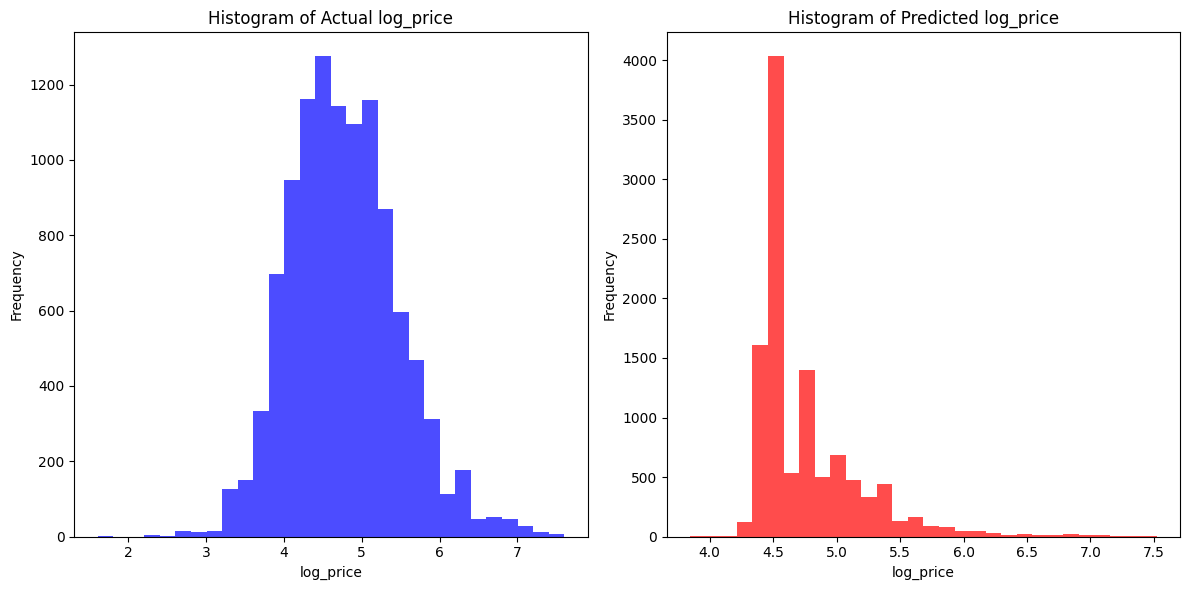

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Actual log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=30, color='red', alpha=0.7)
plt.title('Histogram of Predicted log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
res.corr()

,Actual log_price,Predicted log_price
Actual log_price,1.000000,0.605765
Predicted log_price,0.605765,1.000000


In [13]:
X = df[['log_price', 'bedrooms', 'beds']]
y = df['accommodates']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
coefficients = lr.coef_
intercept = lr.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.75475803 0.5033429  0.9664139 ]
Intercept: -2.6635588743945178


In [16]:
y_pred = lr.predict(X_test)

In [23]:
n = len(y_test)
mse = np.sum((y_test - y_pred) ** 2) / n
print("mean squared error: ", mse)
mean_actual = np.mean(y_test)
tss = np.sum((y_test - mean_actual) ** 2)
rss = np.sum((y_test - y_pred) ** 2)
r2  = 1 - (rss / tss)
print("r2 value: ", r2)

mean squared error:  1.3334491132360207
r2 value:  0.7425631587145416


In [17]:
results = pd.DataFrame({'Actual accommodates': y_test, 'Predicted accommodates': y_pred})
print(results)

       Actual accommodates  Predicted accommodates
31360                    2                1.884131
47229                    2                2.113568
14250                    4                3.416820
4155                     2                2.194032
37572                    3                2.530532
...                    ...                     ...
40315                    7                6.799971
4730                     4                3.145554
8406                     2                2.113568
15982                    2                2.530532
43497                    2                3.209687

[10862 rows x 2 columns]


In [18]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

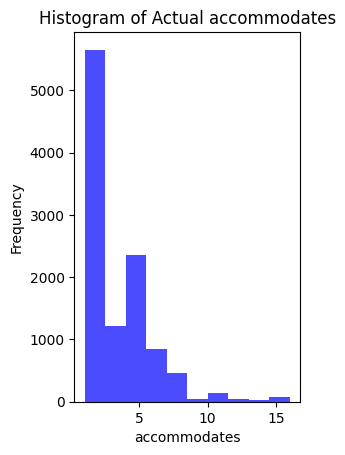

In [19]:
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Actual accommodates')
plt.xlabel('accommodates')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

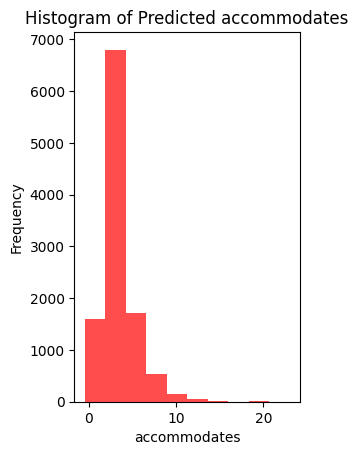

In [20]:
plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Predicted accommodates')
plt.xlabel('accommodates')
plt.ylabel('Frequency')

In [21]:
results.corr()


,Actual accommodates,Predicted accommodates
Actual accommodates,1.000000,0.861746
Predicted accommodates,0.861746,1.000000
